<h2 style='color:green; font-size:50px; font-family:Arial;'><center> Covid-19 Vaccinations </center></h2>

<img src="vaccinations.png" width="500" height="200">

<h2 style='color:green; font-size:20px; font-family:Arial;'><center> Covid-19 Vaccinations </center></h2>
<ol style='color:red'>
    <li>Import libraries in python</li>
    <li>Load data</li>
    <li>
        Data Analysis
        <ul stlye='color:blue'>
            <li>3.1 Exploratory Data Analysis</li>
            <li>3.2 Correlation Matrix</li>
            <li>3.3 Data analysis and visualization</li>
        </ul>
    </li>
</ol>

<h2 style='color:Blue'>1. Import libraries in Python</h2>

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style='color:Blue'>2. Load Data</h2>

In [276]:
#we use pandas python library to import data 
data = pd.read_excel('covid_19_vaccinations.xlsx')

In [277]:
#We are recently done on loading the data
#data's converted to DataFrame
#Let's analysis and play around our data

<h2 style='color:blue'>3. Data Analysis </h2>

In [278]:
#we wanna check how many of observations, count and data type in each demension. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13926 entries, 0 to 13925
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              13926 non-null  object        
 1   iso_code                             13926 non-null  object        
 2   date                                 13926 non-null  datetime64[ns]
 3   total_vaccinations                   8264 non-null   float64       
 4   people_vaccinated                    7552 non-null   float64       
 5   people_fully_vaccinated              5515 non-null   float64       
 6   daily_vaccinations_raw               6905 non-null   float64       
 7   daily_vaccinations                   13714 non-null  float64       
 8   total_vaccinations_per_hundred       8267 non-null   float64       
 9   people_vaccinated_per_hundred        7553 non-null   float64       
 10  people_ful

In [279]:
#check only data type in each dimensions
data.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [280]:
#how many dimensions of dataset are null?
#return false is not null, true is null
data.isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                      True
people_vaccinated                       True
people_fully_vaccinated                 True
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred          True
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [281]:
#how many observations of dataset are null?
data.isnull().count()
#note: for data analysis we should use other methods to replace the null value
#DO NOT delete rows

country                                13926
iso_code                               13926
date                                   13926
total_vaccinations                     13926
people_vaccinated                      13926
people_fully_vaccinated                13926
daily_vaccinations_raw                 13926
daily_vaccinations                     13926
total_vaccinations_per_hundred         13926
people_vaccinated_per_hundred          13926
people_fully_vaccinated_per_hundred    13926
daily_vaccinations_per_million         13926
vaccines                               13926
source_name                            13926
source_website                         13926
dtype: int64

In [282]:
#check the column name
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [283]:
#change the columns name in data
data = data.rename(columns={
    'country': 'country',
    'iso_code': 'iso_code',
    'date' : 'date',
    'total_vaccinations': 'total_vaccinations',
    'people_vaccinated': 'total_vaccinated',
    'people_fully_vaccinated': 'total_fully_vaccinated',
    'daily_vaccinations_raw': 'total_daily_vaccinations_raw',
    'daily_vaccinations': 'total_daily_vaccinations',
    'total_vaccinations_per_hundred':'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred':'total_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred': 'total_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million':'total_daily_vaccinations_per_million',
    'vaccines': 'vaccine_types',
    'source_name': 'source_name',
    'source_website':'website'
})

In [284]:
#check columns name by select first 3 rows
data.head(3)

,country,iso_code,date,total_vaccinations,total_vaccinated,total_fully_vaccinated,total_daily_vaccinations_raw,total_daily_vaccinations,total_vaccinations_per_hundred,total_vaccinated_per_hundred,total_fully_vaccinated_per_hundred,total_daily_vaccinations_per_million,vaccine_types,source_name,website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [285]:
#check columns name after we have changed
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations', 'total_vaccinated',
       'total_fully_vaccinated', 'total_daily_vaccinations_raw',
       'total_daily_vaccinations', 'total_vaccinations_per_hundred',
       'total_vaccinated_per_hundred', 'total_fully_vaccinated_per_hundred',
       'total_daily_vaccinations_per_million', 'vaccine_types', 'source_name',
       'website'],
      dtype='object')

In [286]:
#select last 10 rows
data.tail(3)

,country,iso_code,date,total_vaccinations,total_vaccinated,total_fully_vaccinated,total_daily_vaccinations_raw,total_daily_vaccinations,total_vaccinations_per_hundred,total_vaccinated_per_hundred,total_fully_vaccinated_per_hundred,total_daily_vaccinations_per_million,vaccine_types,source_name,website
13923,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13924,Zimbabwe,ZWE,2021-04-23,365985.0,319732.0,46253.0,14186.0,8755.0,2.46,2.15,0.31,589.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13925,Zimbabwe,ZWE,2021-04-24,372099.0,324488.0,47611.0,6114.0,8600.0,2.50,2.18,0.32,579.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...


<h2 style='color:blue;'> 3.1 Exploratory Data Analysis</h2>

In [287]:
#check observations and dimensions
rows = data.shape[0]
columns = data.shape[1]
print("Rows:", rows)
print("Columns:", columns)
#we have 13926 rows, 15 columns

Rows: 13926
Columns: 15


In [288]:
#check descriptive statistical in our data
#for quantitative variable only
data.describe()

,total_vaccinations,total_vaccinated,total_fully_vaccinated,total_daily_vaccinations_raw,total_daily_vaccinations,total_vaccinations_per_hundred,total_vaccinated_per_hundred,total_fully_vaccinated_per_hundred,total_daily_vaccinations_per_million
count,8.264000e+03,7.552000e+03,5.515000e+03,6.905000e+03,1.371400e+04,8267.000000,7553.000000,5515.000000,13714.000000
mean,4.480786e+06,2.942759e+06,1.435794e+06,1.284697e+05,7.407666e+04,14.397947,10.608467,5.251556,2927.507802
std,1.810312e+07,1.069157e+07,6.182226e+06,4.778331e+05,3.273831e+05,22.221671,14.783882,9.667607,4785.626293
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.556075e+04,4.853100e+04,2.202900e+04,2.906000e+03,8.975000e+02,1.210000,1.110000,0.580000,343.000000
50%,3.910040e+05,3.083720e+05,1.609960e+05,1.547900e+04,5.882000e+03,5.750000,4.450000,2.150000,1438.500000
75%,1.800896e+06,1.296035e+06,6.424320e+05,6.139600e+04,2.736475e+04,18.085000,13.400000,5.585000,3762.750000
max,2.286614e+08,1.323216e+08,9.477233e+07,7.185000e+06,5.190143e+06,201.750000,106.770000,94.980000,118759.000000


<h2 style='color:blue;'> 3.2  Correlation Matrix</h2>

In [289]:
#check relationship in each dimensions
correlations = data.corr(method='pearson')
correlations

,total_vaccinations,total_vaccinated,total_fully_vaccinated,total_daily_vaccinations_raw,total_daily_vaccinations,total_vaccinations_per_hundred,total_vaccinated_per_hundred,total_fully_vaccinated_per_hundred,total_daily_vaccinations_per_million
total_vaccinations,1.000000,0.987553,0.947543,0.887226,0.937056,0.149924,0.185700,0.132204,0.077924
total_vaccinated,0.987553,1.000000,0.884192,0.903478,0.953658,0.173038,0.184515,0.100730,0.091850
total_fully_vaccinated,0.947543,0.884192,1.000000,0.767946,0.816824,0.168806,0.156426,0.179671,0.120257
total_daily_vaccinations_raw,0.887226,0.903478,0.767946,1.000000,0.949890,0.066184,0.100286,0.056896,0.052332
total_daily_vaccinations,0.937056,0.953658,0.816824,0.949890,1.000000,0.068325,0.102737,0.051125,0.051714
total_vaccinations_per_hundred,0.149924,0.173038,0.168806,0.066184,0.068325,1.000000,0.971719,0.934047,0.581118
total_vaccinated_per_hundred,0.185700,0.184515,0.156426,0.100286,0.102737,0.971719,1.000000,0.831874,0.618280
total_fully_vaccinated_per_hundred,0.132204,0.100730,0.179671,0.056896,0.051125,0.934047,0.831874,1.000000,0.609723
total_daily_vaccinations_per_million,0.077924,0.091850,0.120257,0.052332,0.051714,0.581118,0.618280,0.609723,1.000000


Text(0.5, 1.0, 'Correlations in each dimension')

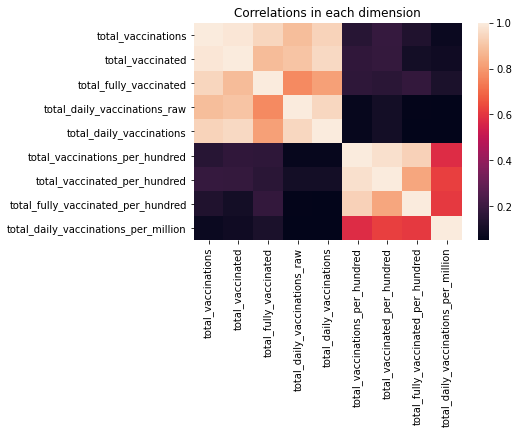

In [290]:
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
sns.heatmap(correlations, 
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values,)
plt.title('Correlations in each dimension')
#Correlations small value : Strong 
#             big value : Low 

<h2 style='color:blue;'> 3.3 Data Analysis and Visualization</h2>

<h4 style='color:green; font-size:30px'><center> World Vaccinations, Vacccinated, Fully Vaccinated </center></h4>

<h4 style='color:red;  font-size:20px'><center> COVID-19 VACCINE TYPES IN USE PER COUNTRY</center></h4>

In [291]:
%matplotlib inline
vaccines = pd.read_excel('vaccine_types.xlsx')
vaccines = vaccines.rename(columns={
    'Type Of Vaccines': 'vaccine_types',
    'Number Of Country': 'number_of_country'
})
vaccines.dtypes

vaccine_types        object
number_of_country     int64
dtype: object

Text(0, 0.5, 'Number Of Vaccine Types')

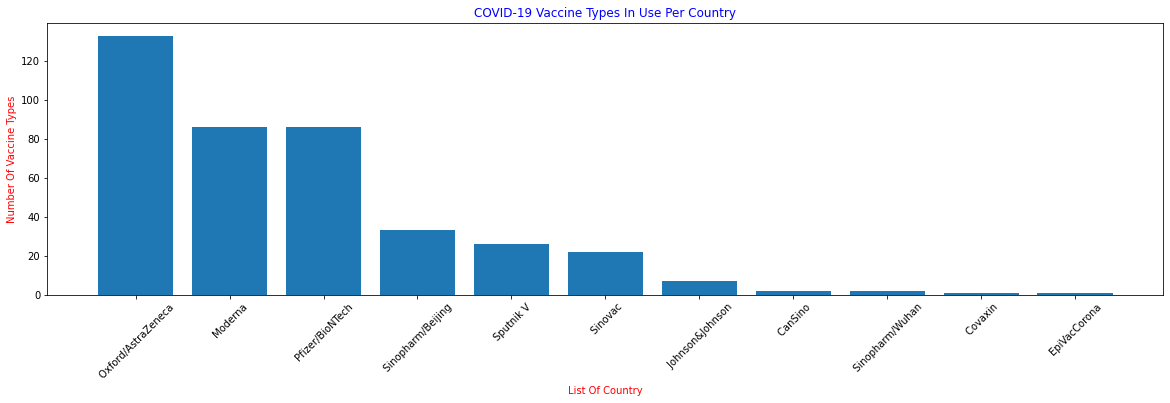

In [292]:
Vaccine_Types = vaccines['vaccine_types']
Number_Of_Country = vaccines['number_of_country']
#Define size of weight and height charts
plt.figure(figsize=(20,5))
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.bar(Vaccine_Types, Number_Of_Country)
plt.title('COVID-19 Vaccine Types In Use Per Country', color='b')
plt.xlabel('List Of Country', color='r')
plt.ylabel('Number Of Vaccine Types', color='r')

<p> There are several the types of vaccine which have used around the world. Some countries are using 4-5 types of COVID-19 Vaccines. For <b style='color:red;'>Oxford/AstraZeneca 133 Countries</b>, 
    <b style='color:blue;'> Pfizer/BioNTech and Moderna 86 Countries</b>,<b style='color:green;'> Sinopharm/Beijing 33 Countries</b>, <b style='color:grey;'>Sinovac 22 Countries </b>, <b style='color:red;'> Johnson&Jonson 7 countries</b>, <b style='color:blue;'> Sinopham/Wuhan and Cansino 2 countries </b>, <b style='color:green;'> EpiVaCorona and Covexin 1 Country </b> are using them.</p>

In [293]:
#create one function to build the bar chart
# function to add value labels
def draw_bar_chart(weight, height, title, xlabel, ylabel,legends):
    plt.title(title, color='b')
    plt.bar(weight, height, color='#34282C')
    plt.xlabel(xlabel, color='r')
    plt.ylabel(ylabel, color='r')
    plt.legend(legends)
    #add label
    #for i in range(len(weight)):
    #    plt.text(i, height[i], height[i])
        
    
    
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.figure(figsize=(20,10))
    plt.show()

In [294]:
def draw_box_plot(weight, title, xlabel, ylabel, legend):
    plt.title(title, color='b')
    plt.boxplot(weight)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)
    
    plt.show()

In [295]:
#import other dataset
data1 = pd.read_excel('covid_19_vaccinations_1.xlsx')


In [296]:
#change the columns name you wanna too.
data1 = data1.rename(columns={
    'country': 'country',
    'iso_code': 'iso_code',
    'date' : 'date',
    'total_vaccinations': 'total_vaccinations',
    'people_vaccinated': 'total_vaccinated',
    'people_fully_vaccinated': 'total_fully_vaccinated',
    'daily_vaccinations_raw': 'total_daily_vaccinations_raw',
    'daily_vaccinations': 'total_daily_vaccinations',
    'total_vaccinations_per_hundred':'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred':'total_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred': 'total_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million':'total_daily_vaccinations_per_million',
    'vaccines': 'vaccine_types',
    'source_name': 'source_name',
    'source_website':'website'
})

In [297]:
data1.head(3)

,country,iso_code,date,total_vaccinations,total_vaccinated,total_fully_vaccinated,total_daily_vaccinations_raw,total_daily_vaccinations,total_vaccinations_per_hundred,total_vaccinated_per_hundred,total_fully_vaccinated_per_hundred,total_daily_vaccinations_per_million,Vaccine1,Vaccine2,Vaccine3,Vaccine4,Vaccine5
0,Afghanistan,AFG,2021-02-22,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN
1,Anguilla,AIA,2021-04-22,6898,6115.0,783.0,NaN,106.0,45.98,40.76,5.22,7066.0,Oxford/AstraZeneca,NaN,NaN,NaN,NaN
2,Antigua and Barbuda,ATG,2021-04-22,29754,29754.0,NaN,NaN,250.0,30.38,30.38,NaN,2553.0,Oxford/AstraZeneca,NaN,NaN,NaN,NaN


<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccinations Per Country</center></h4>

<p></p>

In [298]:
top5_vaccinations = data1.sort_values(by=['total_vaccinations'], ascending=False).head()
top5_vaccinations_countries = top5_vaccinations['country']
top5_vaccinations_number = top5_vaccinations['total_vaccinations']

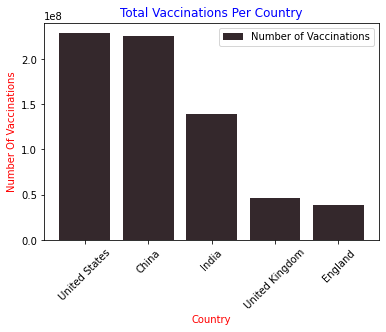

<Figure size 1440x720 with 0 Axes>

In [299]:
draw_bar_chart(top5_vaccinations_countries, top5_vaccinations_number, 'Total Vaccinations Per Country', 
              'Country', 'Number Of Vaccinations', legends=['Number of Vaccinations'])

For total vaccination, there are several Countries are highly received vaccination In each country. For <b style='color:blue'>United States (228,661,408)</b>, <b style='color:red'>China (224,901,000)</b>,<b style='color:blue'> India (139,185,173)</b>, <b style='color:red'>United Kingdom (46,253,754)</b>, and <b style='color:blue'>Brazil (38,027,113)</b>.

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccinations Percent Per Country</center></h4>

<p></p>

In [300]:
#Number of Population
top5_populations = [331002647, 1380004385, 212559409,145934460, 37742157]
percent_top5_vaccinations = top5_vaccinations_number / top5_populations
for i in percent_top5_vaccinations:
    print(100 * i)

69.08144393177618
16.29712212834744
65.48059841472367
31.694881387165168
102.78268409513531


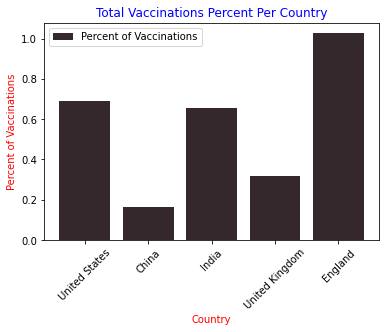

<Figure size 1440x720 with 0 Axes>

In [301]:
draw_bar_chart(top5_vaccinations_countries, percent_top5_vaccinations, 'Total Vaccinations Percent Per Country', 
              'Country', 'Percent of Vaccinations', legends=['Percent of Vaccinations'])

<p></p>

<h4 style='color:red; font-size:20px'><center> Daily Vaccinations Per Country</center></h4>

<p></p>

In [302]:
top5_daily_vaccinations = data1.sort_values(by=['total_daily_vaccinations'], ascending=False).head()
top5_daily_vaccinations_countries = top5_daily_vaccinations['country']
top5_daily_vaccinations_number = top5_daily_vaccinations['total_daily_vaccinations']

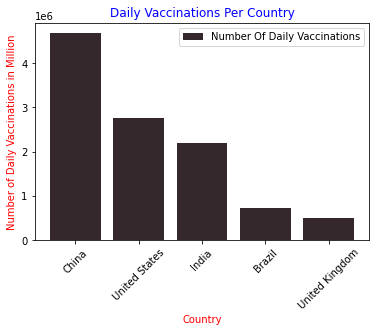

<Figure size 1440x720 with 0 Axes>

In [303]:
draw_bar_chart(top5_daily_vaccinations_countries, top5_daily_vaccinations_number,
              'Daily Vaccinations Per Country', 'Country', 'Number of Daily Vaccinations in Million', ['Number Of Daily Vaccinations'])

 Here are the top 5 countries that are highly received vaccination. it shows the number of Daily vaccinations in these countries. For <b style='color:blue;'>China (4,682,000) </b>,  <b style='color:red;'> United States(2,750,656)</b>,  <b style='color:blue;'> India (2,190,372)</b> ,  <b style='color:red;'> Brazil (725,721)</b> and  <b style='color:blue;'> United Kingdom (496,241)</b> Per day.

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccinated Per Country</center></h4>

<p></p>

In [304]:
top5_vaccinated = data1.sort_values(by=['total_vaccinated'], ascending=False).head(6)
df_top5_vaccinated  = top5_vaccinated[['country','total_vaccinated']]

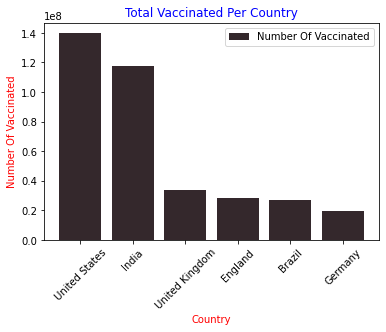

<Figure size 1440x720 with 0 Axes>

In [305]:
top5_vaccinated_countries = df_top5_vaccinated['country']
top5_vaccinated_number = df_top5_vaccinated['total_vaccinated']
draw_bar_chart(top5_vaccinated_countries, top5_vaccinated_number, 'Total Vaccinated Per Country',
              'Country', 'Number Of Vaccinated', ['Number Of Vaccinated'])

There are many countries are received at least one dose for the population. It’s some highlight of countries are have highly vaccinated at least one dose for its citizen. Such as <b style='color:blue;'> The USA (139,978,480) </b>, <b style='color:red;'> India (117,795,008)</b>, <b style='color:blue;'> United Kingdom (33,666,638)</b>,<b style='color:red;'> Brazil (26,873,143)</b> , and <b style='color:blue;'> Germany (19,486,698)</b>.

<p></p>

<h4 style='color:red; font-size:20px'><center> Daily Vaccinated Per Hundred Per Country</center></h4>

<p></p>

In [306]:
top5_daily_vaccinated_per_hundred = data1.sort_values(by=['total_vaccinated_per_hundred'], ascending=False).head(5)
df_top5_daily_vaccinated_per_hundred = top5_daily_vaccinated_per_hundred[['country','total_vaccinated_per_hundred']]
top5_daily_vaccinated_per_country = df_top5_daily_vaccinated_per_hundred['country']
top5_daily_vaccinated_per_number = df_top5_daily_vaccinated_per_hundred['total_vaccinated_per_hundred']
df_top5_daily_vaccinated_per_hundred

,country,total_vaccinated_per_hundred
59,Gibraltar,106.77
51,Falkland Islands,75.57
148,Seychelles,67.62
75,Isle of Man,63.51
76,Israel,62.20


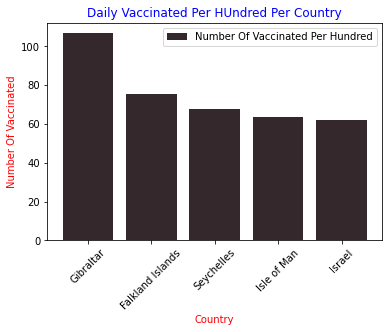

<Figure size 1440x720 with 0 Axes>

In [307]:
draw_bar_chart(top5_daily_vaccinated_per_country, top5_daily_vaccinated_per_number,
              'Daily Vaccinated Per HUndred Per Country', 'Country', 'Number Of Vaccinated', ['Number Of Vaccinated Per Hundred'])

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Fully Vaccinated Per Country </center></h4>

In [308]:
top5_fully_vaccinated = data1.sort_values(by=['total_fully_vaccinated'], ascending=False).head()
top5_fully_vaccinated_countries = top5_fully_vaccinated['country']
top5_fully_vaccinated_number = top5_fully_vaccinated['total_fully_vaccinated']

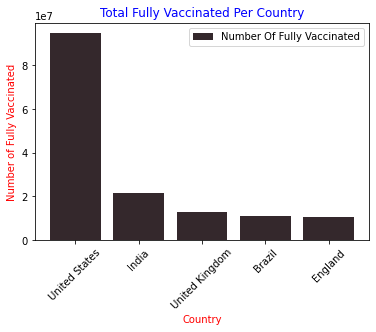

<Figure size 1440x720 with 0 Axes>

In [309]:
draw_bar_chart(top5_fully_vaccinated_countries, top5_fully_vaccinated_number, 'Total Fully Vaccinated Per Country', 
              'Country', 'Number of Fully Vaccinated', ['Number Of Fully Vaccinated'])

In this point, it shows about fully vaccinated per country in the top 5 Countries. Such as <b style='color:Blue'>USA (94,772,329), India (21,390,165), United Kingdom(12,587,116), Brazil (11,153,970) ,and Turkey (7,958,979) </b>

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccination Evaluation </center></h4>

In [310]:
def draw_line_chart(weight, height, title, xlabel, ylabel, legends):
    plt.figure(figsize=(20,7))
    plt.plot(weight, height)
    plt.title(title, color='b', fontsize=20)
    plt.xlabel(xlabel, color='r', fontsize=15)
    plt.ylabel(ylabel, color='r', fontsize=15)
    plt.xticks(rotation='45')
    plt.legend(legends)
    plt.show()

<p></p>

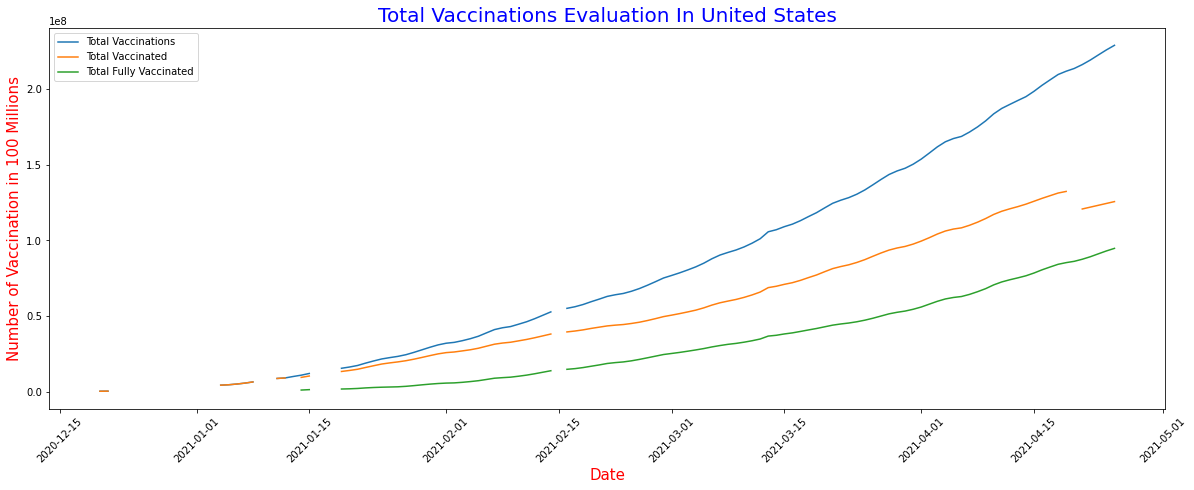

In [311]:
top_vaccination_evaluation = data[data['country'] == 'United States']
top_attribute = top_vaccination_evaluation[['total_vaccinations', 'total_vaccinated','total_fully_vaccinated']]
top_observation = top_vaccination_evaluation['date']

draw_line_chart(top_observation, top_attribute, 
               'Total Vaccinations Evaluation In United States',
               'Date', 'Number of Vaccination in 100 Millions',
                ["Total Vaccinations", "Total Vaccinated", "Total Fully Vaccinated"])


The United States has always been the top of the chart of the total number of vaccination with their active action on vaccination process at approximately <b style='color:blue'> 225,000,000</b>.
From late March, China has pushed their vaccination process, rising from the bottom to slightly just below USA to date.

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccination Percent Evaluation </center></h4>

<p></p>

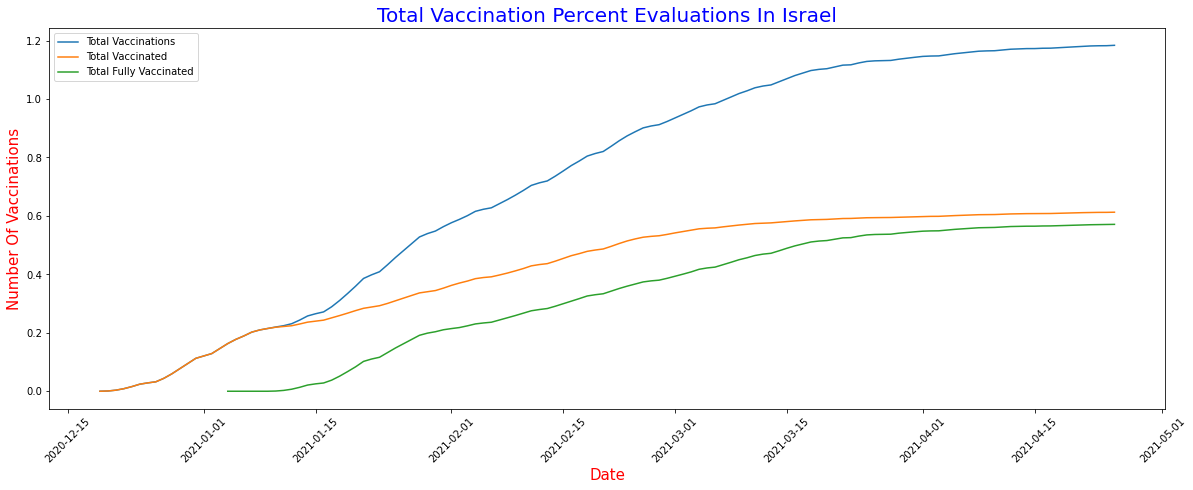

In [312]:
top_percent_evaluation = data[data['country']  == 'Israel']
top_dimensions = top_percent_evaluation[['total_vaccinations', 'total_vaccinated', 'total_fully_vaccinated']]
israel_population = 8788065
top_percent_dimension = top_dimensions/israel_population
top_sample = top_percent_evaluation['date']
draw_line_chart(top_sample , top_percent_dimension, 'Total Vaccination Percent Evaluations In Israel', 
               'Date', 'Number Of Vaccinations',  
                ["Total Vaccinations", "Total Vaccinated", "Total Fully Vaccinated"])

 For vaccination percent, Israel’s highest vaccination percent. The vaccination percent of Israel is increased day by day and topped the chart.
<b style='color:blue; font-size:20px'>Israel received 111% </b> of vaccination percent on 25 April 2021. Hence, we can see that the vaccination is not only provided to the local population, but also to the foreigners who work and live there.

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Vaccinated Evaluation </center></h4>

<p></p>

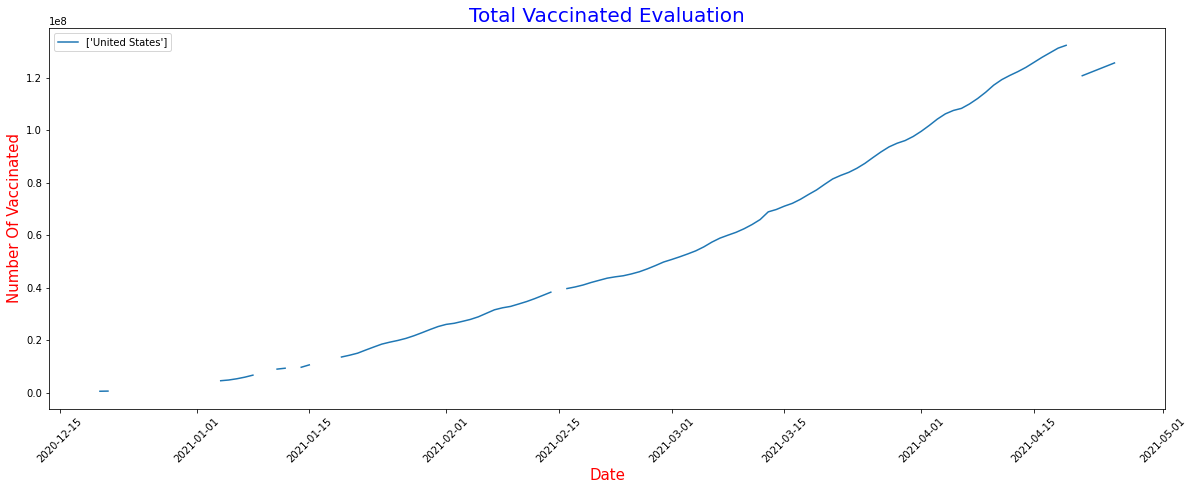

In [335]:
#isin: Select rows with multiple-values
#top4_vaccinated = data[data['country'].isin(['United States', 'India', 'United Kingdom', 'Brazil'])]

top_vaccinated = data[data['country'] == 'United States']
top_dimensions = top_vaccinated['total_vaccinated']
top_samples = top_vaccinated['date']

draw_line_chart(top_samples, top_dimensions, 'Total Vaccinated Evaluation', 'Date', 'Number Of Vaccinated',
              [['United States']])

<p></p>

<h4 style='color:red; font-size:20px'><center> Total Fully Vaccinated Evaluation </center></h4>

<p></p>

<p></p>

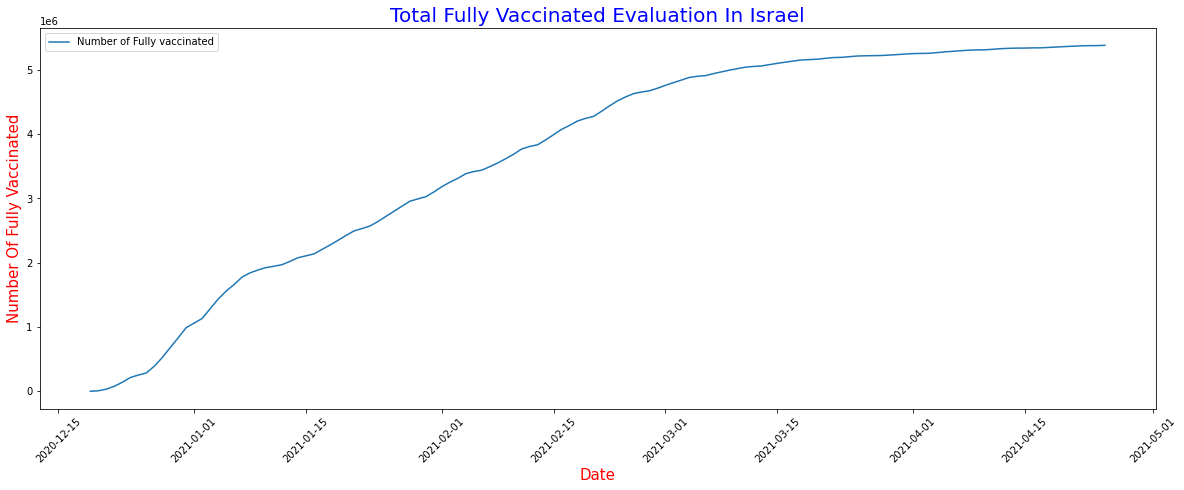

In [341]:
top_vaccinated = top_percent_evaluation['total_vaccinated']
draw_line_chart(top_sample, top_vaccinated, 'Total Fully Vaccinated Evaluation In Israel', 'Date', 'Number Of Fully Vaccinated'
               , ['Number of Fully vaccinated'])

<h4 style='color:green; font-size:30px'><center> Cambodia Vaccinations Progres </center></h4>

<p></p>

<h4 style='color:red; font-size:20px'><center> Cambodia Vaccinations </center></h4>

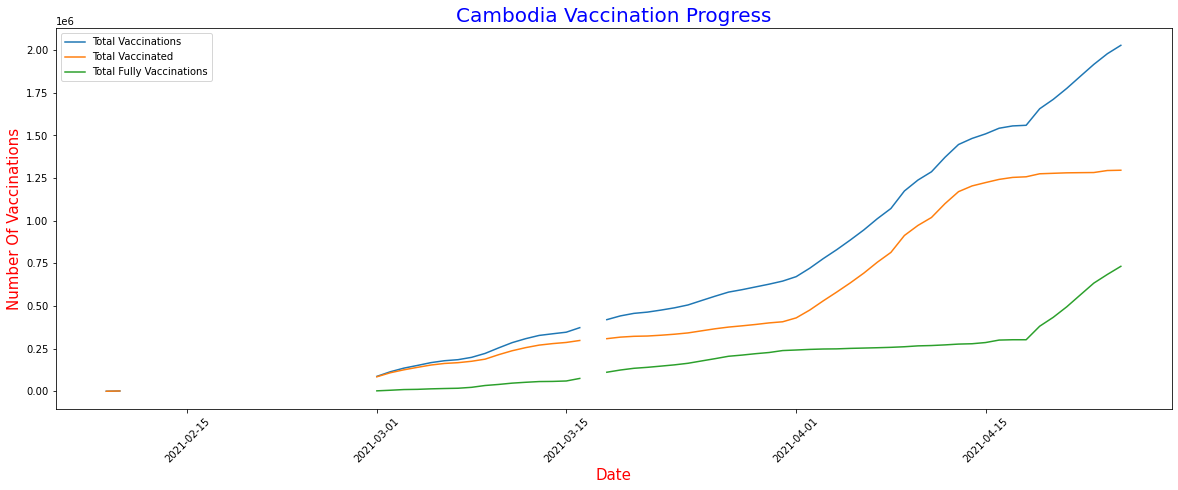

In [314]:
cambodia_vaccination = data[data['country'] == 'Cambodia']
height = cambodia_vaccination[['total_vaccinations', 'total_vaccinated', 'total_fully_vaccinated']]
weight = cambodia_vaccination['date']

draw_line_chart(weight, height, 'Cambodia Vaccination Progress', 'Date', 
               'Number Of Vaccinations', ['Total Vaccinations', 'Total Vaccinated', 'Total Fully Vaccinations'])

n Cambodia has a significant increase on the number of daily vaccination on the vaccination campaign.
On <b style='color:blue'>24 April 2021 </b>, the number of <b style='color:blue'> Cambodia's total vaccination is 2,027,968</b> while there are <b style='color:blue'> 1,295,660 people</b> were vaccinated and <b style='color:blue'> 732,308 people were fully vaccinated</b>.

<h4 style='color:red; font-size:20px'><center> Cambodia Percent Vaccinations </center></h4>

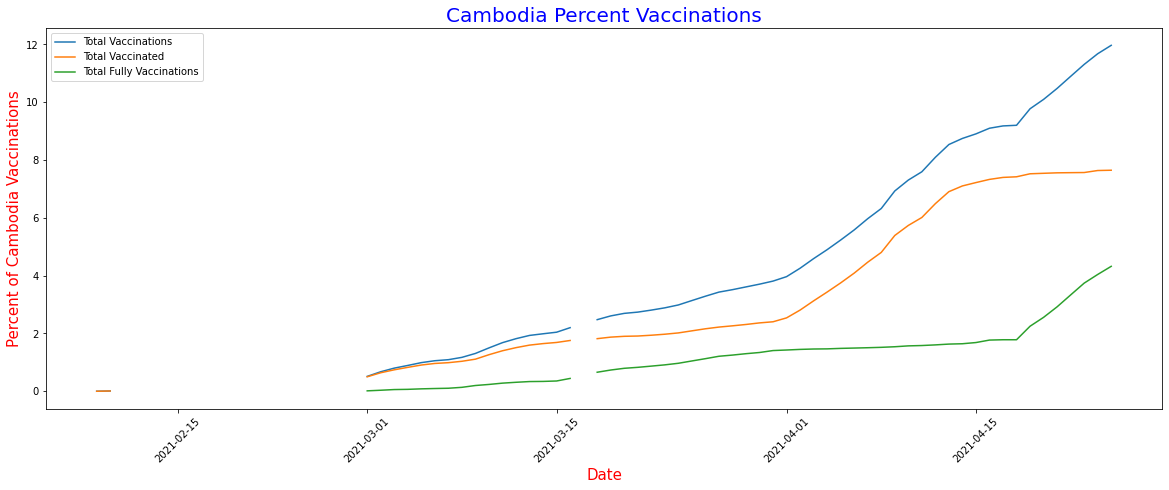

In [315]:
cambodia_population = 16945621
cambodia_percent_vaccinations = (height / cambodia_population) * 100
draw_line_chart(weight, cambodia_percent_vaccinations, 'Cambodia Percent Vaccinations', 'Date', 'Percent of Cambodia Vaccinations',
                ['Total Vaccinations', 'Total Vaccinated', 'Total Fully Vaccinations'])

 For better understanding, we got the information as follows, by calculating in percentage:
On 25 April 2021, Cambodia received
<b style='color:Blue'>12% total vaccination</b>, nearly<b style='color:Blue'> 7% for total vaccination</b>, just above <b style='color:Blue'> 4% for total fully vaccination</b>.

<h4 style='color:red; font-size:20px'><center> Cambodia Daily Vaccinations </center></h4>

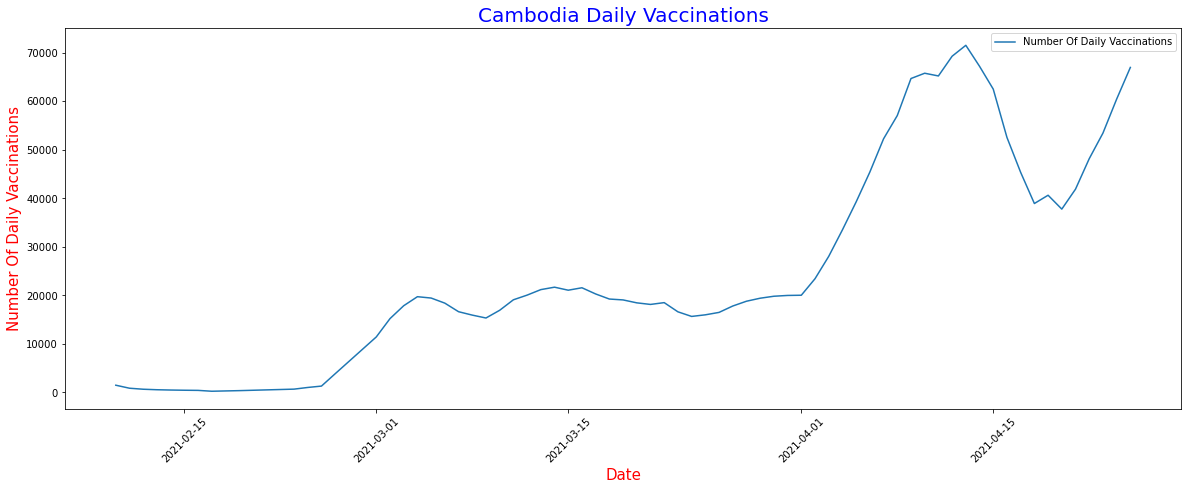

In [316]:
cambodia_daily_vaccinations = cambodia_vaccination['total_daily_vaccinations']
draw_line_chart(weight, cambodia_daily_vaccinations, 'Cambodia Daily Vaccinations', 'Date',
                'Number Of Daily Vaccinations', ['Number Of Daily Vaccinations'])

From 10 February 2021 until 25 April 2021, Cambodia’s increased the vaccination every day despite the significant downfall from 14 April to 19 April due to Khmer New Year Holiday.
Cambodia is using <b style='color:red;font-size:18px'> 3 vaccine types including Oxford/Astrazeneca, Sinopharm/Beijing and Sinovac </b>.

<p></p>

<h4 style='color:green; font-size:30px'><center> Total Vaccinations, Vaccinated, Fully Vaccinated </center></h4>

<p></p>

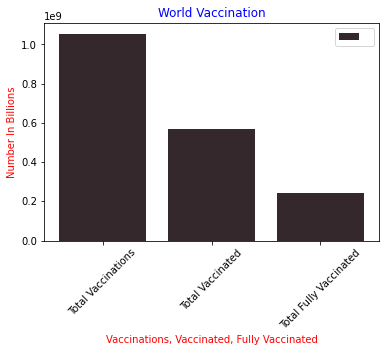

<Figure size 1440x720 with 0 Axes>

In [328]:
sum_vaccinations = data1['total_vaccinations'].sum(axis=0)
sum_vaccinated = data1['total_vaccinated'].sum(axis=0)
sum_fully_vaccinated = data1['total_fully_vaccinated'].sum(axis=0)

world_vaccinations = [sum_vaccinations, sum_vaccinated, sum_fully_vaccinated]
langs = ['Total Vaccinations', 'Total Vaccinated', 'Total Fully Vaccinated']

draw_bar_chart(langs, world_vaccinations, 'World Vaccination', 'Vaccinations, Vaccinated, Fully Vaccinated', 
               'Number In Billions', ' ')



<p></p>

<h4 style='color:green; font-size:30px'><center> World Vaccinations In Average </center></h4>

<p></p>